<a href="https://colab.research.google.com/github/kojiyam/information-transmission-engineering/blob/main/jd3_bandwidth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 帯域幅・シンボルレート

これを再生しながら，スペアナアプリなどで観測するとよい

In [1]:
import numpy as np
np.random.seed(1) # 乱数のseedは固定

import matplotlib.pyplot as plt
#plt.style.use('dark_background') # for dark-mode
plt.rcParams["font.size"] = 16

import IPython.display

In [2]:
sampling_rate = 10e3

In [3]:
T_LENGTH = 10 # 音の時間長 (s)
t = np.arange( T_LENGTH * sampling_rate ) / sampling_rate # サンプリング時刻

In [19]:
cw = 0.1 * np.cos(2*np.pi*523*t)
IPython.display.Audio(cw, rate = sampling_rate, normalize=False)

- 高い方の正弦波`cw`が搬送波
- 低い方の正弦波`np.sin(2*np.pi*1*t)`がベースバンド信号（を模した信号．本当は情報をのせる）


In [20]:
s1 = cw * np.sin(2*np.pi*1*t)
IPython.display.Audio(s1, rate = sampling_rate, normalize=False)

In [24]:
s2 = np.cos(2*np.pi*587*t) * np.sin(2*np.pi*2*t)
IPython.display.Audio(s2, rate = sampling_rate, normalize=False)

In [6]:
s3 = 0.1 * np.cos(2*np.pi*659*t) * np.sin(2*np.pi*10*t)
IPython.display.Audio(s3, rate = sampling_rate, normalize=False)

In [7]:
IPython.display.Audio(s1+s2+s3, rate = sampling_rate)

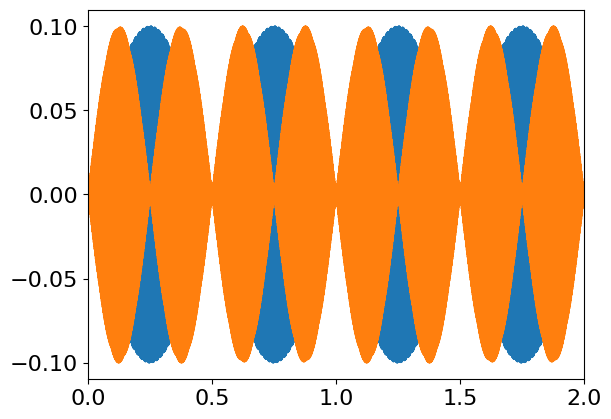

In [8]:
plt.xlim(0,2)
plt.plot(t, s1)
plt.plot(t, s2)

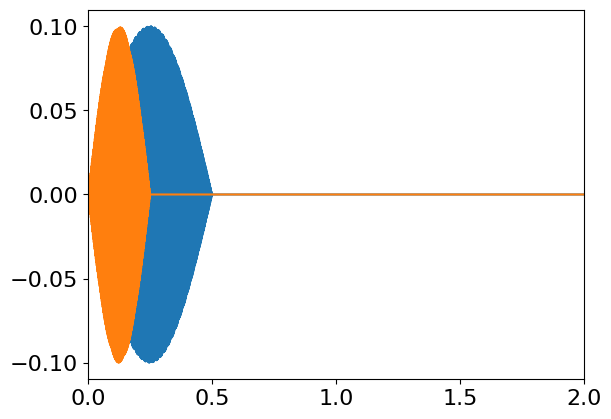

In [9]:
s1l = s1 * (t < 1/2)
s2l = s2 * (t < 1/4)
plt.xlim(0,2)
plt.plot(t, s1l)
plt.plot(t, s2l)


ベースバンド信号の周波数が高いほど，帯域幅は [大きく OR 小さく] なる

# 周波数軸上

In [21]:
CW = np.fft.fft(cw)
S1 = np.fft.fft(s1)
S2 = np.fft.fft(s2)
S3 = np.fft.fft(s3)

CW_power = np.abs(CW/(CW.size/2))**2
S1_power = np.abs(S1/(S1.size/2))**2
S2_power = np.abs(S2/(S2.size/2))**2
S3_power = np.abs(S3/(S3.size/2))**2

In [22]:
S1l = np.fft.fft(s1l)
S1l_power = np.abs(S1l/(S1l.size/2))**2

In [12]:
S2l = np.fft.fft(s2l)

In [13]:
freq = np.fft.fftfreq(s1.size, d=1/sampling_rate)

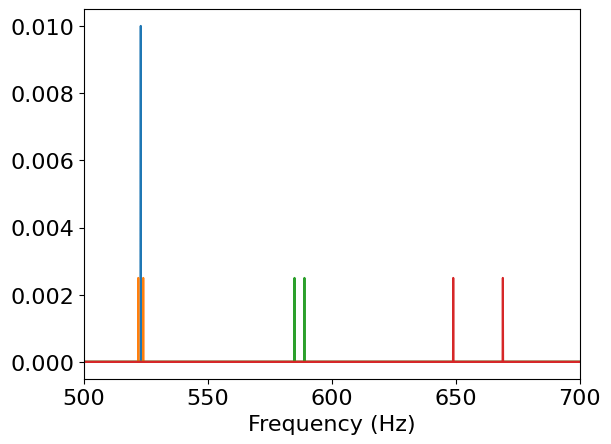

In [26]:
plt.xlim(500,700)
plt.xlabel("Frequency (Hz)")
plt.plot(freq, CW_power)
plt.plot(freq, S1_power)
plt.plot(freq, S2_power)
plt.plot(freq, S3_power)

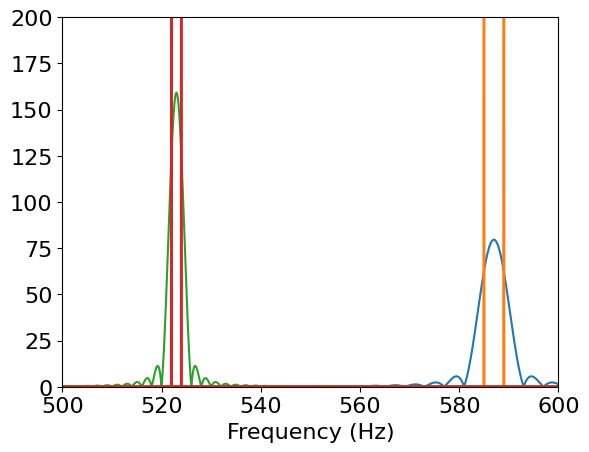

In [15]:
plt.xlim(500,600)
plt.ylim(0,200)
plt.xlabel("Frequency (Hz)")
plt.plot(freq, np.abs(S2l))
plt.plot(freq, np.abs(S2))
plt.plot(freq, np.abs(S1l))
plt.plot(freq, np.abs(S1))